# Natural Language Processing


## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn

##Importing the dataset

In [2]:
review_df= pd.DataFrame(pd.read_json("book_reviews_4.json",lines=True))

##Preprocessing text

In [3]:
review_df = review_df.loc[:,['reviewText','overall']]
review_df.head()

,reviewText,overall
0,Spiritually and mentally inspiring! A book tha...,5
1,This is one my must have books. It is a master...,5
2,This book provides a reflection that you can a...,5
3,I first read THE PROPHET in college back in th...,5
4,A timeless classic. It is a very demanding an...,5


In [4]:
review_df['overall'].value_counts()

5    2999
4    1038
3     484
2     299
1     185
Name: overall, dtype: int64

In [5]:
review_df.isnull().sum()

reviewText    0
overall       0
dtype: int64

In [ ]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-ukny8th6
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-ukny8th6
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.0-cp36-none-any.whl size=11716 sha256=2a55dab1e719de0d9faa41488a7782e164855e6070e210403ccddffac1a0cfa2
  Stored in directory: /tmp/pip-ephem-wheel-cache-yh1spr0m/wheels/a8/18/22/90afa4bd43247fb9a75b710a4a3fcd94966c022ce9e3c7d0a6
Successfully built preprocess-kgptalkie


In [ ]:
import preprocess_kgptalkie as ps
import re

In [ ]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_urls(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [ ]:
review_df['reviewText'] = review_df['reviewText'].apply(lambda x: get_clean(x))
review_df.head()

,reviewText,overall
0,spirityoually and mentally inspiring a book th...,5
1,this is one my myoust have books it is a maste...,5
2,this book provides a reflection that yoyou can...,5
3,i first read the prophet in collexamplee back ...,5
4,a timeless classi see it is a very demanding a...,5


#TFDIF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [ ]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,10),analyzer='char')

In [ ]:
X = tfidf.fit_transform(review_df['reviewText'])
y = review_df['overall']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape


(4004, 5000)

#Linear SVM

##Training the model

In [ ]:
# clf = LinearSVC(C = 20, class_weight='balanced')
svc_classifier = SVC(C = 20, kernel='rbf', class_weight='balanced')
svc_classifier.fit(X_train,y_train)

SVC(C=20, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

##Predicting the results

In [ ]:
y_pred = svc_classifier.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.29      0.34      0.32        29
           2       0.30      0.27      0.29        55
           3       0.31      0.24      0.27       108
           4       0.35      0.42      0.38       205
           5       0.77      0.75      0.76       604

    accuracy                           0.59      1001
   macro avg       0.41      0.41      0.40      1001
weighted avg       0.60      0.59      0.59      1001



##Visualising accuracy

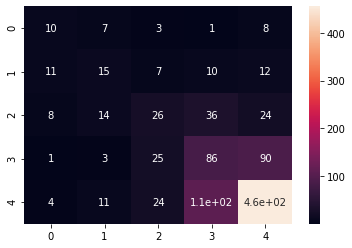

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot=True)

##Test cases

In [ ]:
x = 'Good product'
x = get_clean(x)
vec = tfidf.transform([x])
svc_classifier.predict(vec)

array([4])

In [ ]:
x = 'not bad'
x = get_clean(x)
vec = tfidf.transform([x])
svc_classifier.predict(vec)

array([2])

In [ ]:
x = 'Amazing functionality'
x = get_clean(x)
vec = tfidf.transform([x])
svc_classifier.predict(vec)

array([5])

In [ ]:
x = 'Worst rated product ever'
x = get_clean(x)
vec = tfidf.transform([x])
svc_classifier.predict(vec)

array([1])

#Naive Bayes

##Training the model

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train.toarray(),y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

##Predicting the results

In [ ]:
y_pred = nb_classifier.predict(X_test.toarray())

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.11      0.31      0.16        29
           2       0.11      0.31      0.16        55
           3       0.19      0.33      0.24       108
           4       0.29      0.27      0.28       205
           5       0.78      0.50      0.61       604

    accuracy                           0.42      1001
   macro avg       0.30      0.34      0.29      1001
weighted avg       0.56      0.42      0.46      1001



##Visualising accuracy

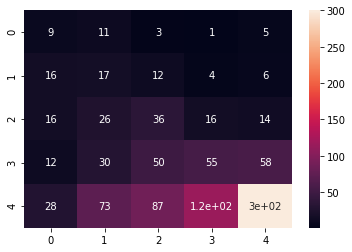

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot=True)

##Test cases

In [ ]:
x = 'Good product'
x = get_clean(x)
vec = tfidf.transform([x])
nb_classifier.predict(vec.toarray())

array([4])

In [ ]:
x = 'not bad'
x = get_clean(x)
vec = tfidf.transform([x])
nb_classifier.predict(vec.toarray())

array([1])

In [ ]:
x = 'Amazing functionality'
x = get_clean(x)
vec = tfidf.transform([x])
nb_classifier.predict(vec.toarray())

array([5])

In [ ]:
x = 'Worst rated product ever'
x = get_clean(x)
vec = tfidf.transform([x])
nb_classifier.predict(vec.toarray())

array([1])

#Random Forest Classifier

##Training the model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(criterion="entropy",random_state=0)
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

##Predicting the results

In [ ]:
y_pred = rf_classifier.predict(X_test)

##Visualising accuracy

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        29
           2       1.00      0.02      0.04        55
           3       0.00      0.00      0.00       108
           4       0.33      0.02      0.05       205
           5       0.61      1.00      0.76       604

    accuracy                           0.61      1001
   macro avg       0.39      0.21      0.17      1001
weighted avg       0.49      0.61      0.47      1001



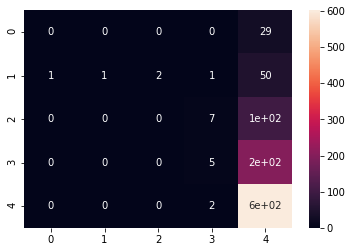

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot=True)

##Test cases

In [ ]:
x = 'Good product'
x = get_clean(x)
vec = tfidf.transform([x])
rf_classifier.predict(vec)

array([5])

In [ ]:
x = 'not bad'
x = get_clean(x)
vec = tfidf.transform([x])
rf_classifier.predict(vec)

array([5])

In [ ]:
x = 'Amazing functionality'
x = get_clean(x)
vec = tfidf.transform([x])
rf_classifier.predict(vec)

array([5])

In [ ]:
x = 'Worst rated product ever'
x = get_clean(x)
vec = tfidf.transform([x])
rf_classifier.predict(vec)

array([5])